<a href="https://colab.research.google.com/github/mj-main/Reading_book_app/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Setting

In [1]:
# 나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 폰트매니저 rebuild
import matplotlib.font_manager as fm
fm._rebuild()

# 런타임-다시시작: 처음에 한 번만 실행하면 됩니다.

Selecting previously unselected package fonts-nanum.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 패키지 설치
!pip install tensorflow==1.3.0
!pip install tinytag
!pip install jamo
!pip install librosa==0.5.1

     |████████████████████████████████| 43.6MB 128kB/s 
     |████████████████████████████████| 1.6MB 66.6MB/s 
     |████████████████████████████████| 890kB 44.7MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107222 sha256=a2c75bb46a7f910839308213a52f5471c9769412a135644f7df8052f0bcfb305
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.1
    Uninstalling bleach-3.2.1:
      Successfully uninstalled bleach-3.2.1
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0
  Created wheel for tinytag: filename=tinytag-1.5.0-cp36-none-any.whl size=27127 sha256=50da59009e90fcdb30cf015b6af690a8bcece9c42d6f56d80a49e81afe488a4f
  Stored 

In [3]:
import os
path = '/content/drive/MyDrive/tacotron/Reading_book_app/logs'
os.chdir(path)
!gdown https://drive.google.com/uc?id=1hk94uyBUrUJ96Nxk_sOZHLSeIqFaNBIj
!unzip pretrained.zip 

Downloading...
From: https://drive.google.com/uc?id=1hk94uyBUrUJ96Nxk_sOZHLSeIqFaNBIj
To: /content/drive/MyDrive/tacotron/Reading_book_app/logs/pretrained.zip
103MB [00:02, 51.1MB/s] 


## 2. TTS

In [ ]:
%%time
!python synthesizer.py --load_path logs/pretrained --text "오늘 밤에도 별이 바람에 스치운다" --num_speakers=3 --speaker_id=2
# speaker_id 0: kss, 1: 손석희, 2: 하니

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarning: Passing (type, 1) or 

## 3. Results

In [ ]:
from IPython.display import Audio
from IPython.display import Image
import matplotlib.pyplot as plt
import librosa

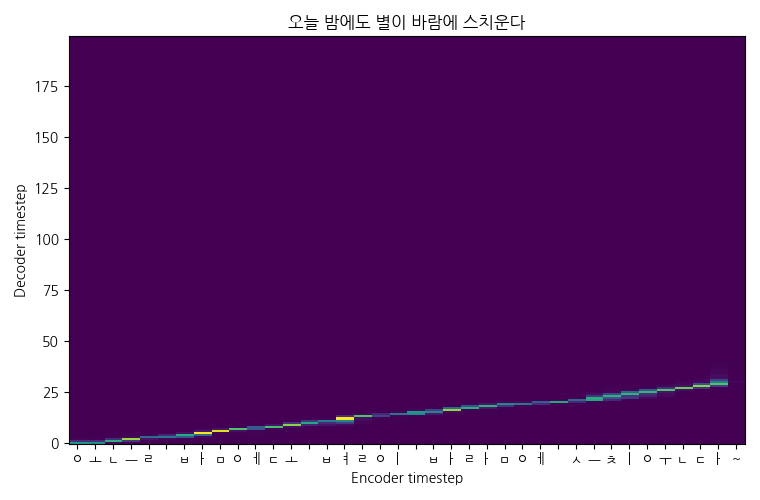

In [ ]:
base_path = "/content/drive/MyDrive/tacotron/Reading_book_app/samples"
file_list = os.listdir(base_path)
Image(base_path + "/" + file_list[-2])

In [ ]:
base_path = "/content/drive/MyDrive/tacotron/Reading_book_app/samples"
file_list = os.listdir(base_path)
audio_np = librosa.load(base_path + "/" + file_list[-1], sr=24000)[0]
Audio(audio_np, rate=24000)